### 期末作业

#### 导入模块

In [2]:
from statistics import covariance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import statsmodels.api as sm
from math import log, e

from scipy.stats import alpha
from sklearn.tree import DecisionTreeClassifier
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

#### 数据准备

##### 定义交易日类

In [3]:
class TradingDay:
    def __init__(self, data):
        if data[1] != '交易':
            raise ValueError('当日不是交易日')
        self._data = data

    def date_standardization(self):
        data = self._data
        date_new = data[0].split('-')
        date_new = date(int(date_new[0]), int(date_new[1]), int(date_new[2]))
        data[0] = date_new
        self._data = data
        return data

    def daily_return(self, yesterday):
        day_yield = (self._data[5]-yesterday)/yesterday
        data = self._data
        data.append(day_yield)
        self._data = data
        return data

    def rise_fall(self):
        data = self._data
        if data[-1] >= 0:
            data.append(1)
            self._data = data
        else:
            data.append(0)
            self._data = data
        return data

    def interval_return(self, other):
        data1, data2 = self._data, other._data
        if data1[0] > data2[0]:
            return data1[5]/data2[5]-1
        else:
            return data2[5]/data1[5]-1


##### 数据读取

In [4]:
def market_data(file):
    data1 = pd.read_csv('C:\\Users\\zhoub\\Desktop\\基于Python的问题解析和实践\\数据\\'+file)
    header = data1.columns
    total_days = len(data1[header[0]])
    data2 = []
    for i in range(total_days):
        if data1[header[1]][i] == '交易':
            yesterday = float(data1[header[5]][i-1])
            data_i = []
            for field in header:
                data = data1[field][i]
                if type(data) != str:
                    data_i.append(float(data))
                else:
                    data_i.append(data)

            trading_day_i = TradingDay(data_i)
            data_i = trading_day_i.date_standardization()
            trading_day_i = TradingDay(data_i)
            data_i = trading_day_i.daily_return(yesterday)
            trading_day_i = TradingDay(data_i)
            data_i = trading_day_i.rise_fall()

            open_high_low = (data1['开盘价'][i]-yesterday)/yesterday
            data_i.append(float(open_high_low))

            data2.append(data_i)

    header_new = []
    for i in header:
        header_new.append(i)
    header_new.append('日收益率')
    header_new.append('日涨跌方向')
    header_new.append('隔夜收益')

    header = ['日期', '交易状态', '开盘价', '最低价', '最高价', '收盘价', '成交量（万股）',
              '成交额（百万）', '换手率', '总市值（百万元）', '市净率', '市盈率', '日收益率', '日涨跌方向']
    data3 = pd.DataFrame(data2, columns=header_new)
    return data3

all_banks = ['工商银行.csv', '农业银行.csv', '中国银行.csv', '建设银行.csv', '交通银行.csv']
a = market_data('工商银行.csv')
a

,日期,交易状态,开盘价,最低价,最高价,收盘价,成交量（万股）,成交额（百万）,换手率,总市值（百万元）,市净率,市盈率,日收益率,日涨跌方向,隔夜收益
0,2015-01-05,交易,6.967071,6.924675,7.277975,7.150787,136585.1684,6849.226392,0.512130,1747016.977,1.245919,6.407704,0.039014,1,0.012320
1,2015-01-06,交易,7.065995,6.995335,7.574747,7.207315,149756.1538,7672.746031,0.561515,1751615.780,1.255768,6.458358,0.007905,1,-0.011858
2,2015-01-07,交易,7.065995,6.995335,7.207315,7.122523,81059.6732,4076.793928,0.303936,1738490.688,1.247993,6.418369,-0.011765,0,-0.019608
3,2015-01-08,交易,7.136655,6.783355,7.164919,6.825751,69204.9068,3396.521114,0.259486,1680629.871,1.195993,6.150937,-0.041667,0,0.001984
4,2015-01-09,交易,6.811619,6.698563,7.277975,6.896411,99159.0381,4905.936678,0.371800,1694606.253,1.208374,6.214611,0.010352,1,-0.002070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426,2024-12-25,交易,15.935070,15.911533,16.570590,16.335212,63609.0132,4411.842457,0.235928,2284600.704,0.691540,6.788784,0.023599,1,-0.001475
2427,2024-12-26,交易,16.335212,15.982146,16.335212,16.311675,48725.2264,3343.500772,0.180723,2281904.582,0.690544,6.779002,-0.001441,0,0.000000
2428,2024-12-27,交易,16.217524,15.911533,16.335212,16.288137,51070.4060,3503.590982,0.189422,2280271.114,0.689547,6.769219,-0.001443,0,-0.005772
2429,2024-12-30,交易,16.193986,16.170448,16.476439,16.358750,48233.0317,3342.787449,0.178898,2289252.626,0.692537,6.798566,0.004335,1,-0.005780


#### 探索性分析

##### 总体走势

[0, 244, 488, 732, 975, 1219, 1462, 1705, 1947, 2189, 2430]


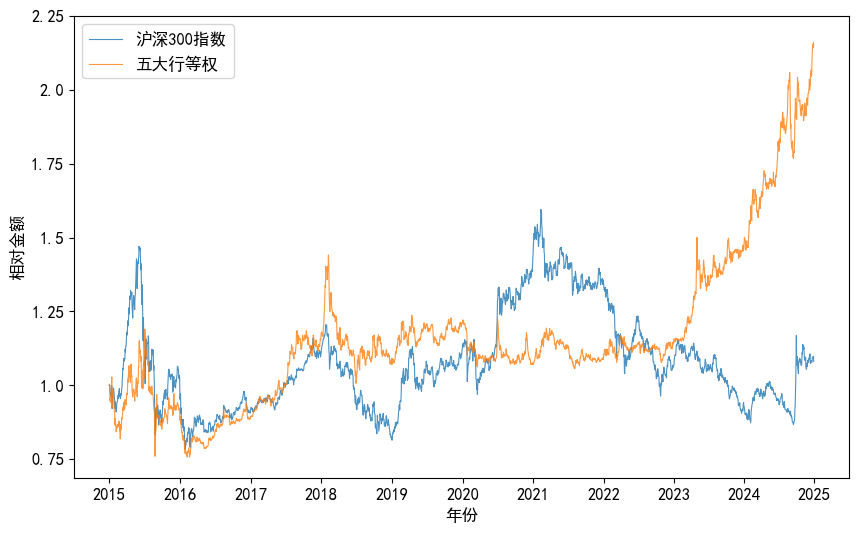

In [6]:
def portfolio_yield(s):
    t = []
    for i in range(len(s[0])):
        a = 0
        for s1 in s:
            a = a+s1[i]/len(s)
        t.append(a)
    return t

def trend(s):
    t = [1]
    m = 1
    for i in s:
        m = m*(1+i)
        t.append(m)
    return t

all_banks = ['工商银行.csv', '农业银行.csv', '中国银行.csv', '建设银行.csv', '交通银行.csv']

hs300 = market_data('沪深300.csv')
hs_trend = hs300['收盘价']
hs_trend2 = []
for i in range(len(hs_trend)):
    hs_trend2.append(hs_trend[i]/hs_trend[0])

date_index = []
all_date = hs300['日期']
date_cut = []
for year in range(2015, 2025):
    date_cut.append([year, 1])
    #date_cut.append([year, 7])
for j in range(len(date_cut)):
    year_month = date_cut[j]
    for i in range(len(all_date)):
        if all_date[i].year == year_month[0] and all_date[i].month == year_month[1]:
            date_index.append(i)
            break
    #date_cut[j] = f'{year_month[0]}-0{year_month[1]}'
    date_cut[j] = str(year_month[0])
date_index.append(len(all_date)-1)
date_cut.append('2025')
print(date_index)

all_banks_trend = []
for bank in all_banks:
    bank_data = market_data(bank)
    bank_data_close = bank_data['收盘价']
    bank_data_close2 = []
    for i in range(len(bank_data_close)):
        bank_data_close2.append(bank_data_close[i]/bank_data_close[0])
    all_banks_trend.append(bank_data_close2)

all_banks_trend2 = portfolio_yield(all_banks_trend)

fig, ax = plt.subplots(figsize=(10, 6))
label_size = 12
ax.plot(hs_trend2, lw=0.8, alpha=0.8)
ax.plot(all_banks_trend2, lw=0.8, alpha=0.8)
ax.set_xticks(date_index, date_cut, fontsize=label_size)
ax.set_yticks([0.75, 1, 1.25, 1.5, 1.75, 2, 2.25], [0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25],
              fontsize=label_size)
ax.set_xlabel('年份', fontsize=label_size)
ax.set_ylabel('相对金额', fontsize=label_size)
ax.legend(['沪深300指数', '五大行等权'], fontsize=label_size)
plt.show()


##### 指数及个股收益、风险特征

###### 一些常用函数

In [5]:
def average(s):
    if len(s) == 0:
        return 0
    else:
        return sum(s)/len(s)

def average_dict(d):
    s1, s2 = 0, 0
    for k in d:
        s1 = s1+d[k]
        s2 = s2+1
    return s2/s1

def variance(s):
    if len(s) == 0:
        return 0
    else:
        mean = average(s)
        var = 0
        for i in s:
            var = var+(i-mean)**2
        var = var/len(s)
        return var

def standard_deviation(s):
    return variance(s)**0.5

def covariance(s1, s2):
    cov = 0
    a1, a2 = average(s1), average(s2)
    for i in range(len(s1)):
        cov = cov+(s1[i]-a1)*(s2[i]-a2)
    return cov/len(s1)

###### 指数及个股收益、风险特征

In [14]:
all_banks = ['工商银行.csv', '农业银行.csv', '中国银行.csv',
             '建设银行.csv', '交通银行.csv', '沪深300.csv']
date_index = [0, 244, 488, 732, 975, 1219, 1462, 1705, 1947, 2189, 2430]
bank_index_all = []
for bank in all_banks:
    bank_data = market_data(bank)
    r_I = bank_data['收盘价'][2430]/bank_data['收盘价'][0]-1
    r = (r_I+1)**0.1-1
    r_year = []
    for i in range(1, len(date_index)):
        r_year.append(bank_data['收盘价'][date_index[i]]/bank_data['收盘价'][date_index[i-1]]-1)
    sigma = standard_deviation(r_year)
    down = []
    for i in range(len(bank_data['收盘价'])):
        for j in range(i, len(bank_data['收盘价'])):
            down.append(bank_data['收盘价'][j]/bank_data['收盘价'][i]-1)
    MD = min(down)
    RS = (r-0.02)/sigma
    RC = (r-0.02)/MD
    r_I, r, sigma, MD, RS, RC = float(r_I), float(r), float(sigma), float(MD), float(RS), float(RC)
    print(round(r_I*100, 2), round(r*100, 2), round(sigma*100, 2),
           round(-MD*100, 2), round(RS, 2), round(-RC, 2))


127.78 8.58 21.93 34.45 0.3 0.19
135.78 8.96 20.95 30.63 0.33 0.23
111.22 7.76 17.96 44.29 0.32 0.13
110.71 7.74 21.88 39.36 0.26 0.15
89.73 6.61 16.8 46.28 0.27 0.1
8.06 0.78 21.02 46.7 -0.06 -0.03


###### 五行等权组合的收益、风险特征

In [21]:
r_I = all_banks_trend2[-1]-1
r = (r_I+1)**0.1-1
r_year = []
for i in range(1, len(date_index)):
    r_year.append(all_banks_trend2[date_index[i]]/all_banks_trend2[date_index[i-1]]-1)
sigma = standard_deviation(r_year)
down = []
for i in range(len(all_banks_trend2)):
    for j in range(i, len(all_banks_trend2)):
        down.append(all_banks_trend2[j]/all_banks_trend2[i]-1)
MD = min(down)
RS = (r-0.02)/sigma
RC = (r-0.02)/MD
r_I, r, sigma, MD, RS, RC = float(r_I), float(r), float(sigma), float(MD), float(RS), float(RC)
print(round(r_I*100, 2), round(r*100, 2), round(sigma*100, 2),
      round(-MD*100, 2), round(RS, 2), round(-RC, 2))

115.04 7.96 19.13 36.39 0.31 0.16


###### 日收益率分布

0.4878650761003702
0.07610037021801727


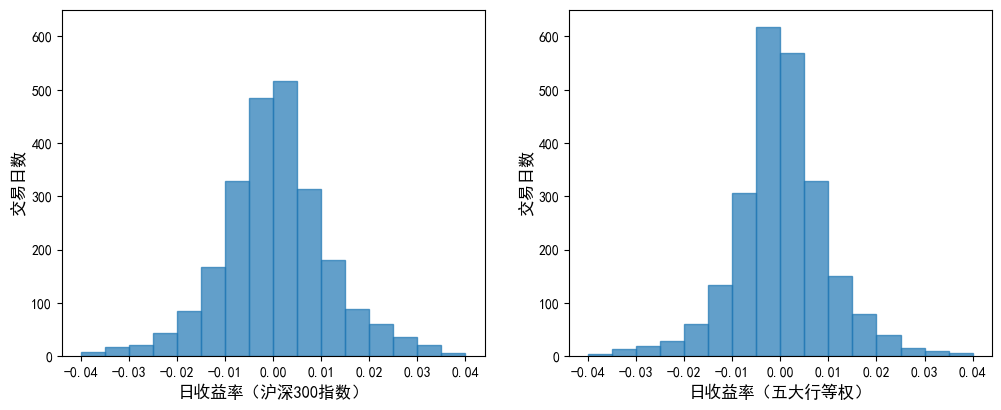

In [7]:
all_banks = ['工商银行.csv', '农业银行.csv', '中国银行.csv', '建设银行.csv', '交通银行.csv']
hs300 = market_data('沪深300.csv')
hs300_day = []
for i in range(len(hs300['日期'])):
    hs300_day.append(float(hs300['日收益率'][i]))

all_banks_day = []
for bank in all_banks:
    bank_data = market_data(bank)
    bank_data_day = bank_data['日收益率']
    all_banks_day.append(bank_data_day)
all_banks_day2 = portfolio_yield(all_banks_day)

a1, a2 = 0, 0
for i in all_banks_day2:
    if abs(i) <= 0.005:
        a1 = a1+1
    if abs(i) >= 0.02:
        a2 = a2+1
print(a1/2431)
print(a2/2431)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.5))
bins = np.arange(-0.04, 0.04001, 0.005)
ax1.hist(hs300_day, bins=bins, alpha=0.7, edgecolor='C0')
ax1.set_ylim(0, 650)
ax1.set_xlabel('日收益率（沪深300指数）', fontsize=12)
ax1.set_ylabel('交易日数', fontsize=12)
ax2.hist(all_banks_day2, bins=bins, alpha=0.7, edgecolor='C0')
ax2.set_ylim(0, 650)
ax2.set_xlabel('日收益率（五大行等权）', fontsize=12)
ax2.set_ylabel('交易日数', fontsize=12)
plt.show()



##### 市场β值与α值

In [26]:
hs300 = market_data('沪深300.csv')
hs300_day = []
for i in range(len(hs300['日期'])):
    hs300_day.append(float(hs300['日收益率'][i])-0.00005)

all_banks = ['工商银行.csv', '农业银行.csv', '中国银行.csv', '建设银行.csv', '交通银行.csv']
for bank in all_banks:
    bank_data = market_data(bank)
    bank_data_day = bank_data['日收益率']
    day_return = []
    for i in range(len(bank_data_day)):
        day_return.append(float(bank_data_day[i])-0.00005)
    beta = covariance(hs300_day, day_return)/variance(hs300_day)
    alpha = average(day_return)-beta*average(hs300_day)

    data_fit = pd.DataFrame({'t': day_return, 'f': hs300_day})
    feature = data_fit[['f']]
    target = data_fit['t']
    feature = sm.add_constant(feature)
    model = sm.OLS(target, feature)
    results = model.fit()
    print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      t   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     705.5
Date:                Sat, 20 Dec 2025   Prob (F-statistic):          1.08e-136
Time:                        15:16:14   Log-Likelihood:                 7436.9
No. Observations:                2431   AIC:                        -1.487e+04
Df Residuals:                    2429   BIC:                        -1.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.506      0.1

#### 涨跌预测模型构建

##### 特征检验

In [8]:
hs300 = market_data('沪深300.csv')
hs_data = hs300['日收益率']

start_stop = [[244, 2431]]

for s_s in start_stop:

    t_value_f = dict()
    train_start = s_s[0]
    train_stop = s_s[1]

    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_1 = bank_data['日收益率']
        bank_data_2 = bank_data['开盘价']
        bank_data_3 = bank_data['最高价']
        bank_data_4 = bank_data['最低价']
        bank_data_5 = bank_data['收盘价']
        bank_data_6 = bank_data['成交量（万股）']
        bank_data_7 = bank_data['市净率']
        bank_data_8 = bank_data['换手率']
        bank_data_9 = bank_data['隔夜收益']
        bank_data_10 = bank_data['日涨跌方向']

# 训练集目标
        target = []
        for i in range(train_start, train_stop):
            target.append(bank_data_1[i])

# 一日指标
        feature1 = [] # 前一日指数收益率
        feature2 = [] # 前一日隔夜收益率
        feature3 = [] # 前一日盘内收益率
        feature4 = [] # 前一日高低变动率
        feature5 = [] # 前一日成交量
        feature6 = [] # 前一日市净率
        feature7 = [] # 前一日换手率
        feature8 = [] # 前一日成交量变化率

        for i in range(train_start-1, train_stop-1):
            feature1.append(hs_data[i])
            feature2.append(bank_data_9[i])
            feature3.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5.append(bank_data_6[i])
            feature6.append(bank_data_7[i])
            feature7.append(bank_data_8[i])
            feature8.append((bank_data_6[i] - bank_data_6[i-1]) / bank_data_6[i-1])

# 多日指标
        feature9 = [] # 前十日隔夜收益率均值
        feature10 = [] # 前十日盘内收益率均值
        feature11 = [] # 前十日日收益率标准差
        feature12 = [] # 前十日夏普比率
        feature13 = [] # 十日内相对高低价格均值
        feature14 = [] # 前一日价格相对前十日平均价格
        feature15 = [] # 前一日成交量相对前十日平均成交量
        feature16 = [] # 前十日换手率均值

        for i in range(train_start-1, train_stop-1):
            f9_1 = bank_data_9[i-9:i+1]
            feature9.append(average(f9_1))

            f10_1 = []
            for j in range(i-9, i+1):
                f10_1.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10.append(average(f10_1))

            f11_1 = bank_data_1[i-9:i+1]
            feature11.append(standard_deviation(f11_1))

            feature12.append((average(f11_1)-0.00005)/standard_deviation(f11_1))

            f13_1 = []
            for j in range(i-9, i+1):
                f13_1.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13.append(average(f13_1))

            f14_1 = bank_data_5[i-9:i+1]
            feature14.append((bank_data_5[i] - average(f14_1)) / average(f14_1))

            f15_1 = bank_data_6[i-9:i+1]
            feature15.append((bank_data_6[i] - average(f15_1)) / average(f15_1))

            f16_1 = bank_data_8[i-9:i+1]
            feature16.append(average(f16_1))

        data_fit = pd.DataFrame({'t': target,
                             'f1': feature1, 'f2': feature2, 'f3': feature3, 'f4': feature4,
                             'f5': feature5, 'f6': feature6, 'f7': feature7, 'f8': feature8,
                             'f9': feature9, 'f10': feature10, 'f11': feature11,
                             'f12': feature12, 'f13': feature13, 'f14': feature14,
                             'f15': feature15, 'f16': feature16})

        feature_all = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
         'f11', 'f12', 'f13', 'f14', 'f15', 'f16']

        for f in feature_all:
            feature = data_fit[[f]]
            target = data_fit['t']
            feature = sm.add_constant(feature)
            model = sm.OLS(target, feature)
            results = model.fit()
            t = float(results.pvalues[f])
            t = abs(t)
            if f in t_value_f:
                t_value_f[f].append(round(t, 3))
            else:
                t_value_f[f] = [f, round(t, 3)]


    t_value_f_l = []
    for f in t_value_f:
        t_value_f1 = t_value_f[f]
        t_value_f1.append(average(t_value_f1[1:]))
        t_value_f_l.append(t_value_f1)

    t_value_f_l = pd.DataFrame(t_value_f_l,
                        columns=['特征', '工商银行', '农业银行', '中国银行', '建设银行', '交通银行', '平均'])
    print(t_value_f_l)

     特征   工商银行   农业银行   中国银行   建设银行   交通银行      平均
0    f1  0.038  0.007  0.186  0.093  0.014  0.0676
1    f2  0.453  0.171  0.000  0.039  0.163  0.1652
2    f3  0.559  0.315  0.056  0.049  0.210  0.2378
3    f4  0.058  0.131  0.213  0.330  0.213  0.1890
4    f5  0.036  0.088  0.040  0.415  0.076  0.1310
5    f6  0.187  0.111  0.017  0.124  0.026  0.0930
6    f7  0.036  0.059  0.040  0.415  0.076  0.1252
7    f8  0.151  0.146  0.153  0.334  0.206  0.1980
8    f9  0.196  0.794  0.809  0.740  0.770  0.6618
9   f10  0.479  0.315  0.532  0.981  0.836  0.6286
10  f11  0.016  0.037  0.169  0.058  0.102  0.0764
11  f12  0.621  0.615  0.207  0.418  0.472  0.4666
12  f13  0.065  0.273  0.050  0.024  0.104  0.1032
13  f14  0.971  0.027  0.959  0.863  0.504  0.6648
14  f15  0.340  0.415  0.477  0.157  0.718  0.4214
15  f16  0.167  0.337  0.119  0.018  0.186  0.1654


##### 线性回归模型

###### 特征选择

In [41]:
hs300 = market_data('沪深300.csv')
hs_data = hs300['日收益率']

start_stop = [[244, 732], [488, 975], [732, 1219], [975, 1462],
              [1219, 1705], [1462, 1947], [1705, 2189]]
#start_stop = [[244, 2431]]

for s_s in start_stop:

    t_value_f = dict()
    train_start = s_s[0]
    train_stop = s_s[1]

    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_1 = bank_data['日收益率']
        bank_data_2 = bank_data['开盘价']
        bank_data_3 = bank_data['最高价']
        bank_data_4 = bank_data['最低价']
        bank_data_5 = bank_data['收盘价']
        bank_data_6 = bank_data['成交量（万股）']
        bank_data_7 = bank_data['市净率']
        bank_data_8 = bank_data['换手率']
        bank_data_9 = bank_data['隔夜收益']
        bank_data_10 = bank_data['日涨跌方向']

# 训练集目标
        target = []
        for i in range(train_start, train_stop):
            target.append(bank_data_1[i])

# 一日指标
        feature1 = [] # 前一日指数收益率
        feature2 = [] # 前一日隔夜收益率
        feature3 = [] # 前一日盘内收益率
        feature4 = [] # 前一日高低变动率
        feature5 = [] # 前一日成交量
        feature6 = [] # 前一日市净率
        feature7 = [] # 前一日换手率
        feature8 = [] # 前一日成交量变化率

        for i in range(train_start-1, train_stop-1):
            feature1.append(hs_data[i])
            feature2.append(bank_data_9[i])
            feature3.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5.append(bank_data_6[i])
            feature6.append(bank_data_7[i])
            feature7.append(bank_data_8[i])
            feature8.append((bank_data_6[i] - bank_data_6[i-1]) / bank_data_6[i-1])

# 多日指标
        feature9 = [] # 前十日隔夜收益率均值
        feature10 = [] # 前十日盘内收益率均值
        feature11 = [] # 前十日日收益率标准差
        feature12 = [] # 前十日夏普比率
        feature13 = [] # 十日内相对高低价格均值
        feature14 = [] # 前一日价格相对前十日平均价格
        feature15 = [] # 前一日成交量相对前十日平均成交量
        feature16 = [] # 前十日换手率均值

        for i in range(train_start-1, train_stop-1):
            f9_1 = bank_data_9[i-9:i+1]
            feature9.append(average(f9_1))

            f10_1 = []
            for j in range(i-9, i+1):
                f10_1.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10.append(average(f10_1))

            f11_1 = bank_data_1[i-9:i+1]
            feature11.append(standard_deviation(f11_1))

            feature12.append((average(f11_1)-0.00005)/standard_deviation(f11_1))

            f13_1 = []
            for j in range(i-9, i+1):
                f13_1.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13.append(average(f13_1))

            f14_1 = bank_data_5[i-9:i+1]
            feature14.append((bank_data_5[i] - average(f14_1)) / average(f14_1))

            f15_1 = bank_data_6[i-9:i+1]
            feature15.append((bank_data_6[i] - average(f15_1)) / average(f15_1))

            f16_1 = bank_data_8[i-9:i+1]
            feature16.append(average(f16_1))

        data_fit = pd.DataFrame({'t': target,
                             'f1': feature1, 'f2': feature2, 'f3': feature3, 'f4': feature4,
                             'f5': feature5, 'f6': feature6, 'f7': feature7, 'f8': feature8,
                             'f9': feature9, 'f10': feature10, 'f11': feature11,
                             'f12': feature12, 'f13': feature13, 'f14': feature14,
                             'f15': feature15, 'f16': feature16})

        feature_all = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
         'f11', 'f12', 'f13', 'f14', 'f15', 'f16']
        #feature_all = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15']
        #feature_all = ['f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10','f11', 'f12', 'f14', 'f15', 'f16']
        #feature_all = ['f2', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f14', 'f15', 'f16']

        for f in feature_all:
            feature = data_fit[[f]]
            target = data_fit['t']
            feature = sm.add_constant(feature)
            model = sm.OLS(target, feature)
            results = model.fit()
            t = float(results.pvalues[f])
            t = abs(t)
            if f in t_value_f:
                t_value_f[f].append(round(t, 3))
            else:
                t_value_f[f] = [f, round(t, 3)]


    t_value_f_l = []
    for f in t_value_f:
        t_value_f1 = t_value_f[f]
        t_value_f1.append(average(t_value_f1[1:]))
        t_value_f_l.append(t_value_f1)

    b1 = []
    for i in range(1, 6):
        t1 = []
        for j in range(16):
            t1.append(t_value_f_l[j][i])
        for j in range(16):
            if t_value_f_l[j][i] == min(t1):
                b1.append(j+1)
                break
    print(b1)

    t_value_f_l = pd.DataFrame(t_value_f_l,
                        columns=['特征', '工商银行', '农业银行', '中国银行', '建设银行', '交通银行', '平均'])
    #print(t_value_f_l)


[11, 6, 6, 13, 6]
[3, 11, 4, 3, 6]
[6, 4, 5, 3, 10]
[11, 13, 5, 16, 16]
[11, 1, 9, 15, 16]
[15, 3, 3, 3, 3]
[2, 14, 3, 14, 14]


###### 预测与评估

In [9]:
date_index = [0, 244, 488, 732, 975, 1219, 1462, 1705, 1947, 2189, 2431]
for i in range(3, 10):
    print(date_index[i+1]-date_index[i])

243
244
243
243
242
242
242


In [42]:
a = [[11, 6, 6, 13, 6],
[3, 11, 4, 3, 6],
[6, 4, 5, 3, 10],
[11, 13, 5, 16, 16],
[11, 1, 9, 15, 16],
[15, 3, 3, 3, 3],
[2, 14, 3, 14, 14]]
b = [[], [], [], [], []]
for i in a:
    for j in range(len(i)):
        b[j].append(f'f{i[j]}_test')
print(b)

[['f11_test', 'f3_test', 'f6_test', 'f11_test', 'f11_test', 'f15_test', 'f2_test'], ['f6_test', 'f11_test', 'f4_test', 'f13_test', 'f1_test', 'f3_test', 'f14_test'], ['f6_test', 'f4_test', 'f5_test', 'f5_test', 'f9_test', 'f3_test', 'f3_test'], ['f13_test', 'f3_test', 'f3_test', 'f16_test', 'f15_test', 'f3_test', 'f14_test'], ['f6_test', 'f6_test', 'f10_test', 'f16_test', 'f16_test', 'f3_test', 'f14_test']]


4.18
9.25
9.33
18.88
0.23
0.38


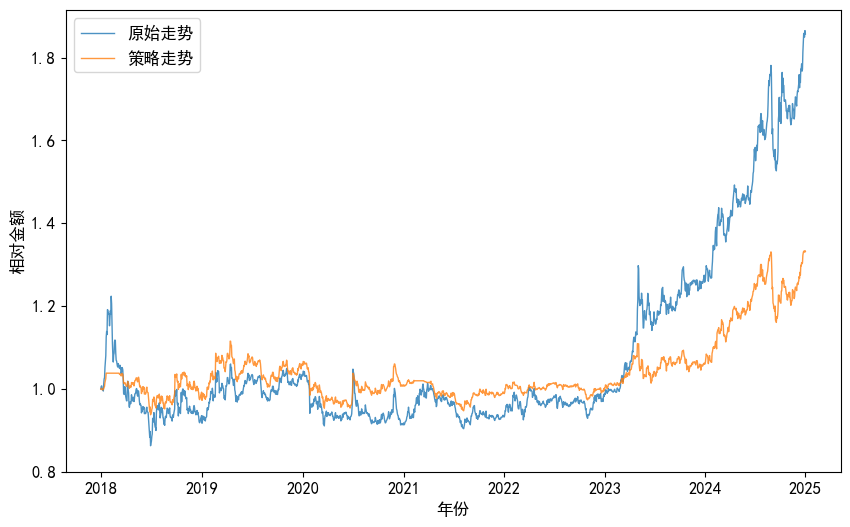

In [15]:
hs300 = market_data('沪深300.csv')
hs_data = hs300['日收益率']

bank_feature = {'工商银行.csv': ['f11', 'f3', 'f6', 'f11', 'f11', 'f15', 'f2'],
                '农业银行.csv': ['f6', 'f11', 'f4', 'f13', 'f1', 'f3', 'f14'],
                '中国银行.csv': ['f6', 'f4', 'f5', 'f5', 'f9', 'f3', 'f3'],
                '建设银行.csv': ['f13', 'f3', 'f3', 'f16', 'f15', 'f3', 'f14'],
                '交通银行.csv': ['f6', 'f6', 'f10', 'f16', 'f16', 'f3', 'f14']}
bank_feature_test = {'工商银行.csv': ['f11_test', 'f3_test', 'f6_test', 'f11_test', 'f11_test',
                                    'f15_test', 'f2_test'],
                     '农业银行.csv': ['f6_test', 'f11_test', 'f4_test', 'f13_test', 'f1_test',
                                      'f3_test', 'f14_test'],
                     '中国银行.csv': ['f6_test', 'f4_test', 'f5_test', 'f5_test', 'f9_test',
                                      'f3_test', 'f3_test'],
                     '建设银行.csv': ['f13_test', 'f3_test', 'f3_test', 'f16_test', 'f15_test',
                                      'f3_test', 'f14_test'],
                     '交通银行.csv': ['f6_test', 'f6_test', 'f10_test', 'f16_test', 'f16_test',
                                      'f3_test', 'f14_test']}

start_stop = [[244, 732], [488, 975], [732, 1219], [975, 1462],
              [1219, 1705], [1462, 1947], [1705, 2189]]
start_stop_test = [[732, 975], [975, 1219], [1219, 1462], [1462, 1705],
                   [1705, 1947], [1947,2189], [2189, 2431]]

print_out = [[], [], [], []]
trend_lin_18_24 = []
trend_ori_18_24 = []

for s_s in range(len(start_stop)):
    train_start = start_stop[s_s][0]
    train_stop = start_stop[s_s][1]
    test_start = start_stop_test[s_s][0]
    test_stop = start_stop_test[s_s][1]
    trend_all = []
    accuracy_all, precision_all = [], []

    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_1 = bank_data['日收益率']
        bank_data_2 = bank_data['开盘价']
        bank_data_3 = bank_data['最高价']
        bank_data_4 = bank_data['最低价']
        bank_data_5 = bank_data['收盘价']
        bank_data_6 = bank_data['成交量（万股）']
        bank_data_7 = bank_data['市净率']
        bank_data_8 = bank_data['换手率']
        bank_data_9 = bank_data['隔夜收益']

# 设置模型的Y
        target = []
        for i in range(train_start, train_stop):
            target.append(bank_data_1[i])

# 一日指标
        feature1 = [] # 前一日指数收益率
        feature2 = [] # 前一日隔夜收益率
        feature3 = [] # 前一日盘内收益率
        feature4 = [] # 前一日高低变动率
        feature5 = [] # 前一日成交量
        feature6 = [] # 前一日市净率
        feature7 = [] # 前一日换手率
        feature8 = [] # 前一日成交量变化率

        for i in range(train_start-1, train_stop-1):
            feature1.append(hs_data[i])
            feature2.append(bank_data_9[i])
            feature3.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5.append(bank_data_6[i])
            feature6.append(bank_data_7[i])
            feature7.append(bank_data_8[i])
            feature8.append((bank_data_6[i] - bank_data_6[i-1]) / bank_data_6[i-1])

# 多日指标
        feature9 = [] # 前十日隔夜收益率均值
        feature10 = [] # 前十日盘内收益率均值
        feature11 = [] # 前十日日收益率标准差
        feature12 = [] # 前十日夏普比率
        feature13 = [] # 十日内相对高低价格均值
        feature14 = [] # 前一日价格相对前十日平均价格
        feature15 = [] # 前一日成交量相对前十日平均成交量
        feature16 = [] # 前十日换手率均值

        for i in range(train_start-1, train_stop-1):
            f9_1 = bank_data_9[i-9:i+1]
            feature9.append(average(f9_1))

            f10_1 = []
            for j in range(i-9, i+1):
                f10_1.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10.append(average(f10_1))

            f11_1 = bank_data_1[i-9:i+1]
            feature11.append(standard_deviation(f11_1))

            feature12.append((average(f11_1)-0.00005)/standard_deviation(f11_1))

            f13_1 = []
            for j in range(i-9, i+1):
                f13_1.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13.append(average(f13_1))

            f14_1 = bank_data_5[i-9:i+1]
            feature14.append((bank_data_5[i] - average(f14_1)) / average(f14_1))

            f15_1 = bank_data_6[i-9:i+1]
            feature15.append((bank_data_6[i] - average(f15_1)) / average(f15_1))

            f16_1 = bank_data_8[i-9:i+1]
            feature16.append(average(f16_1))

# 设置模型的Y
        target_test = []
        for i in range(test_start, test_stop):
            target_test.append(bank_data_1[i])

# 一日指标
        feature1_test = [] # 前一日指数收益率
        feature2_test = [] # 前一日隔夜收益率
        feature3_test = [] # 前一日盘内收益率
        feature4_test = [] # 前一日高低变动率
        feature5_test = [] # 前一日成交量
        feature6_test = [] # 前一日市净率
        feature7_test = [] # 前一日换手率
        feature8_test = [] # 前一日成交量变化率

        for i in range(test_start-1, test_stop-1):
            feature1_test.append(hs_data[i])
            feature2_test.append(bank_data_9[i])
            feature3_test.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4_test.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5_test.append(bank_data_6[i])
            feature6_test.append(bank_data_7[i])
            feature7_test.append(bank_data_8[i])
            feature8_test.append((bank_data_6[i] - bank_data_6[i-1]) / bank_data_6[i-1])

# 多日指标
        feature9_test = [] # 前十日隔夜收益率均值
        feature10_test = [] # 前十日盘内收益率均值
        feature11_test = [] # 前十日日收益率标准差
        feature12_test = [] # 前十日夏普比率
        feature13_test = [] # 十日内相对高低价格均值
        feature14_test = [] # 前一日价格相对前十日平均价格
        feature15_test = [] # 前一日成交量相对前十日平均成交量
        feature16_test = [] # 前十日换手率均值

        for i in range(test_start-1, test_stop-1):
            f9_1 = bank_data_9[i-9:i+1]
            feature9_test.append(average(f9_1))

            f10_1_test = []
            for j in range(i-9, i+1):
                f10_1_test.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10_test.append(average(f10_1_test))

            f11_1_test = bank_data_1[i-9:i+1]
            feature11_test.append(standard_deviation(f11_1_test))

            feature12_test.append((average(f11_1_test)-0.00005)/standard_deviation(f11_1_test))

            f13_1_test = []
            for j in range(i-9, i+1):
                f13_1_test.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13_test.append(average(f13_1_test))

            f14_1_test = bank_data_5[i-9:i+1]
            feature14_test.append((bank_data_5[i] - average(f14_1_test)) / average(f14_1_test))

            f15_1_test = bank_data_6[i-9:i+1]
            feature15_test.append((bank_data_6[i] - average(f15_1_test)) / average(f15_1_test))

            f16_1_test = bank_data_8[i-9:i+1]
            feature16_test.append(average(f16_1_test))

# 模型训练
        data_train = pd.DataFrame({'t': target,
                             'f1': feature1, 'f2': feature2, 'f3': feature3, 'f4': feature4,
                             'f5': feature5, 'f6': feature6, 'f7': feature7, 'f8': feature8,
                             'f9': feature9, 'f10': feature10, 'f11': feature11,
                             'f12': feature12, 'f13': feature13, 'f14': feature14,
                             'f15': feature15, 'f16': feature16})

        feature_all = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
         'f11', 'f12', 'f13', 'f14', 'f15', 'f16']

        feature_train = data_train[bank_feature[bank][s_s]]
        #feature_train = data_train['f11']
        target_train = data_train['t']
        feature_train = sm.add_constant(feature_train)
        model = sm.OLS(target_train, feature_train)
        results = model.fit()

# 模型测试
        data_test = pd.DataFrame(
        {'t_test': target_test,
         'f1_test': feature1_test, 'f2_test': feature2_test, 'f3_test': feature3_test,
         'f4_test': feature4_test, 'f5_test': feature5_test, 'f6_test': feature6_test,
         'f7_test': feature7_test, 'f8_test': feature8_test, 'f9_test': feature9_test,
         'f10_test': feature10_test, 'f11_test': feature11_test, 'f12_test': feature12_test,
         'f13_test': feature13_test, 'f14_test': feature14_test, 'f15_test': feature15_test,
         'f16_test': feature16_test})

        feature_all_test = ['f1_test', 'f2_test', 'f3_test', 'f4_test', 'f5_test', 'f6_test',
                        'f7_test', 'f8_test', 'f9_test', 'f10_test', 'f11_test', 'f12_test',
                        'f13_test', 'f14_test', 'f15_test', 'f16_test']

        feature_test = data_test[bank_feature_test[bank][s_s]]
        #feature_test = data_test['f11_test']
        feature_test = sm.add_constant(feature_test)
        predict = results.predict(feature_test)

        position = [0]

        TP, TN, FP, FN = 0, 0, 0, 0
        for i in range(len(predict)):
            if predict[i] >= 0:
                position.append(1)
                if target_test[i] >= 0:
                    TP = TP+1
                else:
                    FP = FP+1
            else:
                position.append(0)
                if target_test[i] >= 0:
                    FN = FN+1
                else:
                    TN = TN+1

        money = 1
        money2 = 1
        trend_test = [1]
        for i in range(len(predict)):
            money2 = money2*(1+target_test[i])
            if position[i+1] == 1:
                if position[i] == 1:
                    money = money*(1+target_test[i])
                else:
                    money = money*(1-0.03/100+target_test[i])
            else:
                if position[i] == 1:
                    money = money*(1-0.08/100)
                else:
                    money = money
            trend_test.append(float(money))
        trend_all.append(trend_test)

        num = TP+TN+FP+FN
        accuracy = 100*(TP+TN)/num
        if TP+FP != 0:
            precision = 100*TP/(TP+FP)
        else:
            precision = 0
        P_rate = 100*(TP+FN)/num
        accuracy_all.append(accuracy)
        precision_all.append(precision)
        #print(round(accuracy, 1), round(precision, 1), round(P_rate, 1))

    linear_trend = portfolio_yield(trend_all)

    def frame_to_list(s):
        t = []
        for i in s:
            t.append(i)
        return t

    all_banks_day = []
    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_close = frame_to_list(bank_data['收盘价'][test_start-1:test_stop])
        bank_data_close2 = []
        for i in range(len(bank_data_close)):
            bank_data_close2.append(bank_data_close[i]/bank_data_close[0])
        all_banks_day.append(bank_data_close2)

    original_trend = portfolio_yield(all_banks_day)

    original_yield = (original_trend[-1]-1)*100
    linear_yield = (linear_trend[-1]-1)*100

    print_out[0].append(average(accuracy_all))
    print_out[1].append(average(precision_all))
    print_out[2].append(original_yield/100)
    print_out[3].append(linear_yield/100)

    trend_lin_18_24.append(linear_trend)
    trend_ori_18_24.append(original_trend)

trend_lin_18_24_7 = []
trend_ori_18_24_7 = []
money = 1
for i in range(7):
    if i == 0:
        trend_lin_18_24_7 = trend_lin_18_24[i]
        money = trend_lin_18_24_7[-1]
    else:
        for j in range(1, len(trend_lin_18_24[i])):
            trend_lin_18_24_7.append(trend_lin_18_24[i][j] * money)
        money = trend_lin_18_24_7[-1]

for i in range(7):
    if i == 0:
        trend_ori_18_24_7 = trend_ori_18_24[i]
        money = trend_ori_18_24_7[-1]
    else:
        for j in range(1, len(trend_ori_18_24[i])):
            trend_ori_18_24_7.append(trend_ori_18_24[i][j] * money)
        money = trend_ori_18_24_7[-1]

lin_year_yield = trend_lin_18_24_7[-1]**(1/7)
lin_year_yield = lin_year_yield-1
ori_year_yield = trend_ori_18_24_7[-1]**(1/7)
ori_year_yield = ori_year_yield-1
lin_year_sigma = standard_deviation(print_out[3])
ori_year_sigma = standard_deviation(print_out[2])

print(round(lin_year_yield*100, 2))
print(round(ori_year_yield*100, 2))
print(round(lin_year_sigma*100, 2))
print(round(ori_year_sigma*100, 2))
print(round((lin_year_yield-0.02)/lin_year_sigma, 2))
print(round((ori_year_yield-0.02)/ori_year_sigma, 2))

date_index = [0, 243, 487, 730, 973, 1215, 1457, 1698]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(trend_ori_18_24_7, lw=1, alpha=0.8)
ax.plot(trend_lin_18_24_7, lw=1, alpha=0.8)
ax.set_xticks([0, 243, 487, 730, 973, 1215, 1457, 1698],
              ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'], fontsize=12)
ax.set_yticks([0.8, 1, 1.2, 1.4, 1.6, 1.8], [0.8, 1.0, 1.2, 1.4, 1.6, 1.8], fontsize=12)
ax.set_xlabel('年份', fontsize=12)
ax.set_ylabel('相对金额', fontsize=12)
ax.legend(['原始走势', '策略走势'], fontsize=12)
plt.show()

##### 决策树模型

###### 建模、预测与评估

[[53.909465020576135, 57.295081967213115, 54.650205761316876, 51.769547325102884, 55.20661157024794, 53.38842975206611, 53.14049586776859], [54.45540252233677, 58.12862281247838, 54.87847205533503, 58.23683534422277, 60.353458601948965, 62.9172910326623, 63.11424404472533], [-0.06430102166244678, 0.10244094393873372, -0.11001648367178563, 0.01592906187684351, 0.06041807596287141, 0.2740905596968528, 0.47391576325240825], [-0.0321842878316535, 0.12225829154739465, -0.05918391223976127, -0.01994541424321894, 0.05025474481326753, 0.18614103169809249, 0.25917590934996526]]
6.67
9.25
11.19
18.88
0.42
0.38


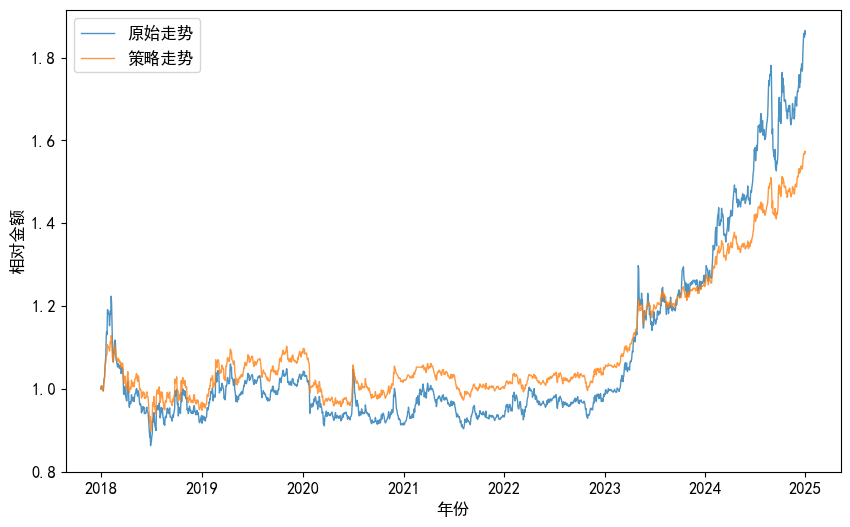

In [83]:
hs300 = market_data('沪深300.csv')
hs_data = hs300['日收益率']

start_stop = [[244, 732], [488, 975], [732, 1219], [975, 1462],
              [1219, 1705], [1462, 1947], [1705, 2189]]
start_stop_test = [[732, 975], [975, 1219], [1219, 1462], [1462, 1705],
                   [1705, 1947], [1947,2189], [2189, 2431]]

def my_accuracy(s1, s2):
    a = 0
    for i in range(len(s1)):
        if s1[i] == s2[i]:
            a = a+1
    return a/len(s1)

print_out = [[], [], [], []]
trend_tree_18_24 = []
trend_ori_18_24 = []

hp = []

for s_s in range(len(start_stop)):
    train_start = start_stop[s_s][0]
    train_stop = start_stop[s_s][1]
    test_start = start_stop_test[s_s][0]
    test_stop = start_stop_test[s_s][1]

    trend_all = []
    accuracy_all, precision_all = [], []

    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_1 = bank_data['日收益率']
        bank_data_2 = bank_data['开盘价']
        bank_data_3 = bank_data['最高价']
        bank_data_4 = bank_data['最低价']
        bank_data_5 = bank_data['收盘价']
        bank_data_6 = bank_data['成交量（万股）']
        bank_data_7 = bank_data['市净率']
        bank_data_8 = bank_data['换手率']
        bank_data_9 = bank_data['隔夜收益']
        bank_data_10 = bank_data['日涨跌方向']

        # 训练集目标
        target = []
        for i in range(train_start, train_stop):
            target.append(bank_data_10[i])

        # 一日指标
        feature1 = []  # 前一日指数收益率
        feature2 = []  # 前一日隔夜收益率
        feature3 = []  # 前一日盘内收益率
        feature4 = []  # 前一日高低变动率
        feature5 = []  # 前一日成交量
        feature6 = []  # 前一日市净率
        feature7 = []  # 前一日换手率
        feature8 = []  # 前一日成交量变化率

        for i in range(train_start - 1, train_stop - 1):
            feature1.append(hs_data[i])
            feature2.append(bank_data_9[i])
            feature3.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5.append(bank_data_6[i])
            feature6.append(bank_data_7[i])
            feature7.append(bank_data_8[i])
            feature8.append((bank_data_6[i] - bank_data_6[i - 1]) / bank_data_6[i - 1])

        # 多日指标
        feature9 = []  # 前十日隔夜收益率均值
        feature10 = []  # 前十日盘内收益率均值
        feature11 = []  # 前十日日收益率标准差
        feature12 = []  # 前十日夏普比率
        feature13 = []  # 十日内相对高低价格均值
        feature14 = []  # 前一日价格相对前十日平均价格
        feature15 = []  # 前一日成交量相对前十日平均成交量
        feature16 = []  # 前十日换手率均值

        for i in range(train_start - 1, train_stop - 1):
            f9_1 = bank_data_9[i - 9:i + 1]
            feature9.append(average(f9_1))

            f10_1 = []
            for j in range(i - 9, i + 1):
                f10_1.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10.append(average(f10_1))

            f11_1 = bank_data_1[i - 9:i + 1]
            feature11.append(standard_deviation(f11_1))

            feature12.append((average(f11_1) - 0.00005) / standard_deviation(f11_1))

            f13_1 = []
            for j in range(i - 9, i + 1):
                f13_1.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13.append(average(f13_1))

            f14_1 = bank_data_5[i - 9:i + 1]
            feature14.append((bank_data_5[i] - average(f14_1)) / average(f14_1))

            f15_1 = bank_data_6[i - 9:i + 1]
            feature15.append((bank_data_6[i] - average(f15_1)) / average(f15_1))

            f16_1 = bank_data_8[i - 9:i + 1]
            feature16.append(average(f16_1))

        data_fit = pd.DataFrame({'f1': feature1, 'f2': feature2, 'f3': feature3, 'f4': feature4,
                                 'f5': feature5, 'f6': feature6, 'f7': feature7, 'f8': feature8,
                                 'f9': feature9, 'f10': feature10, 'f11': feature11,
                                 'f12': feature12, 'f13': feature13, 'f14': feature14,
                                 'f15': feature15, 'f16': feature16})

        feature_all = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10',
                       'f11', 'f12', 'f13', 'f14', 'f15', 'f16']
        feature_all = ['f1', 'f2', 'f3', 'f4', 'f6', 'f7', 'f11', 'f13', 'f14', 'f16']

        num = len(data_fit['f1'])
        feature = []
        for i in range(num):
            feature.append([])
            for f in feature_all:
                feature[i].append(data_fit[f][i])

        hyper_parameters = [['entropy', 'gini'],
                            [1, 2, 3],
                            [0.6, 0.8, 1]]
        accuracy_verify = dict()
        accuracy_verify_list = []

        verify_size = int(len(feature)*0.8)
        feature_train1, feature_train2 = feature[:verify_size], feature[verify_size:]
        target_train1, target_train2 = target[:verify_size], target[verify_size:]
        for h1 in range(len(hyper_parameters[0])):
            for h2 in range(len(hyper_parameters[1])):
                for h3 in range(len(hyper_parameters[2])):
                    model = DecisionTreeClassifier(criterion=hyper_parameters[0][h1],
                                                   max_depth=hyper_parameters[1][h2],
                                                   max_features=hyper_parameters[2][h3])
                    model.fit(feature_train1, target_train1)
                    predict_verify = model.predict(feature_train2)
                    accuracy_verify[hyper_parameters[0][h1]+'_'
                     +str(hyper_parameters[1][h2])+'_'
                     +str(hyper_parameters[2][h3])] = my_accuracy(predict_verify, target_train2)

        h = 0
        for v in accuracy_verify:
            accuracy_verify_list.append(accuracy_verify[v])
        for v in accuracy_verify:
            if accuracy_verify[v] == max(accuracy_verify_list):
                h = v
                break
        h = h.split('_')
        h1, h2, h3 = h[0], int(h[1]), eval(h[2])
        hp.append([h1, h2, h3])

        model = DecisionTreeClassifier(criterion=h1, max_depth=h2, max_features=h3)
        model.fit(feature, target)

        # 测试集目标
        target_test = []
        day_yield_test = []
        for i in range(test_start, test_stop):
            target_test.append(bank_data_10[i])
            day_yield_test.append(bank_data_1[i])

        # 一日指标
        feature1_test = []  # 前一日指数收益率
        feature2_test = []  # 前一日隔夜收益率
        feature3_test = []  # 前一日盘内收益率
        feature4_test = []  # 前一日高低变动率
        feature5_test = []  # 前一日成交量
        feature6_test = []  # 前一日市净率
        feature7_test = []  # 前一日换手率
        feature8_test = []  # 前一日成交量变化率

        for i in range(test_start - 1, test_stop - 1):
            feature1_test.append(hs_data[i])
            feature2_test.append(bank_data_9[i])
            feature3_test.append((bank_data_5[i] - bank_data_2[i]) / bank_data_2[i])
            feature4_test.append((bank_data_3[i] - bank_data_4[i]) / bank_data_2[i])
            feature5_test.append(bank_data_6[i])
            feature6_test.append(bank_data_7[i])
            feature7_test.append(bank_data_8[i])
            feature8_test.append((bank_data_6[i] - bank_data_6[i - 1]) / bank_data_6[i - 1])

        # 多日指标
        feature9_test = []  # 前十日隔夜收益率均值
        feature10_test = []  # 前十日盘内收益率均值
        feature11_test = []  # 前十日日收益率标准差
        feature12_test = []  # 前十日夏普比率
        feature13_test = []  # 十日内相对高低价格均值
        feature14_test = []  # 前一日价格相对前十日平均价格
        feature15_test = []  # 前一日成交量相对前十日平均成交量
        feature16_test = []  # 前十日换手率均值

        for i in range(test_start - 1, test_stop - 1):
            f9_1 = bank_data_9[i - 9:i + 1]
            feature9_test.append(average(f9_1))

            f10_1_test = []
            for j in range(i - 9, i + 1):
                f10_1_test.append((bank_data_5[j] - bank_data_2[j]) / bank_data_2[j])
            feature10_test.append(average(f10_1_test))

            f11_1_test = bank_data_1[i - 9:i + 1]
            feature11_test.append(standard_deviation(f11_1_test))

            feature12_test.append((average(f11_1_test) - 0.00005) / standard_deviation(f11_1_test))

            f13_1_test = []
            for j in range(i - 9, i + 1):
                f13_1_test.append((bank_data_3[j] - bank_data_4[j]) / bank_data_2[j])
            feature13_test.append(average(f13_1_test))

            f14_1_test = bank_data_5[i - 9:i + 1]
            feature14_test.append((bank_data_5[i] - average(f14_1_test)) / average(f14_1_test))

            f15_1_test = bank_data_6[i - 9:i + 1]
            feature15_test.append((bank_data_6[i] - average(f15_1_test)) / average(f15_1_test))

            f16_1_test = bank_data_8[i - 9:i + 1]
            feature16_test.append(average(f16_1_test))

        data_fit_test = pd.DataFrame(
            {'f1_test': feature1_test, 'f2_test': feature2_test, 'f3_test': feature3_test,
             'f4_test': feature4_test, 'f5_test': feature5_test, 'f6_test': feature6_test,
             'f7_test': feature7_test, 'f8_test': feature8_test, 'f9_test': feature9_test,
             'f10_test': feature10_test, 'f11_test': feature11_test, 'f12_test': feature12_test,
             'f13_test': feature13_test, 'f14_test': feature14_test, 'f15_test': feature15_test,
             'f16_test': feature16_test})

        feature_all_test = ['f1_test', 'f2_test', 'f3_test', 'f4_test', 'f5_test', 'f6_test',
                            'f7_test', 'f8_test', 'f9_test', 'f10_test', 'f11_test', 'f12_test',
                            'f13_test', 'f14_test', 'f15_test', 'f16_test']
        feature_all_test = ['f1_test', 'f2_test', 'f3_test', 'f4_test', 'f6_test', 'f7_test',
                            'f11_test', 'f13_test', 'f14_test', 'f16_test']

        num = len(data_fit_test['f1_test'])
        feature_test = []
        for i in range(num):
            feature_test.append([])
            for f in feature_all_test:
                feature_test[i].append(data_fit_test[f][i])

        predict = model.predict(feature_test)

        position = [0]

        TP, TN, FP, FN = 0, 0, 0, 0
        for i in range(len(predict)):
            if predict[i] == 1:
                position.append(1)
                if target_test[i] == 1:
                    TP = TP+1
                else:
                    FP = FP+1
            else:
                position.append(0)
                if target_test[i] == 1:
                    FN = FN+1
                else:
                    TN = TN+1

        num = TP + TN + FP + FN
        accuracy = 100 * (TP + TN) / num
        precision = 100 * TP / (TP + FP)
        P_rate = 100 * (TP + FN) / num
        accuracy_all.append(accuracy)
        precision_all.append(precision)

        money = 1
        money2 = 1
        trend_test = [1]

        for i in range(len(predict)):
            if position[i+1] == 1:
                if position[i] == 1:
                    money = money*(1+day_yield_test[i])
                else:
                    money = money*(1-0.03/100+day_yield_test[i])
            else:
                if position[i] == 1:
                    money = money*(1-0.08/100)
                else:
                    money = money
            trend_test.append(float(money))
        trend_all.append(trend_test)

    tree_trend = portfolio_yield(trend_all)

    def frame_to_list(s):
        t = []
        for i in s:
            t.append(i)
        return t

    all_banks_day = []
    for bank in all_banks:

        bank_data = market_data(bank)
        bank_data_close = frame_to_list(bank_data['收盘价'][test_start-1:test_stop])
        bank_data_close2 = []
        for i in range(len(bank_data_close)):
            bank_data_close2.append(bank_data_close[i]/bank_data_close[0])
        all_banks_day.append(bank_data_close2)

    original_trend = portfolio_yield(all_banks_day)

    original_yield = (original_trend[-1]-1)*100
    tree_yield = (tree_trend[-1]-1)*100

    print_out[0].append(average(accuracy_all))
    print_out[1].append(average(precision_all))
    print_out[2].append(original_yield/100)
    print_out[3].append(tree_yield/100)

    trend_tree_18_24.append(tree_trend)
    trend_ori_18_24.append(original_trend)

print(print_out)

trend_tree_18_24_7 = []
trend_ori_18_24_7 = []
money = 1
for i in range(7):
    if i == 0:
        trend_tree_18_24_7 = trend_tree_18_24[i]
        money = trend_tree_18_24_7[-1]
    else:
        for j in range(1, len(trend_tree_18_24[i])):
            trend_tree_18_24_7.append(trend_tree_18_24[i][j] * money)
        money = trend_tree_18_24_7[-1]

for i in range(7):
    if i == 0:
        trend_ori_18_24_7 = trend_ori_18_24[i]
        money = trend_ori_18_24_7[-1]
    else:
        for j in range(1, len(trend_ori_18_24[i])):
            trend_ori_18_24_7.append(trend_ori_18_24[i][j] * money)
        money = trend_ori_18_24_7[-1]

tree_year_yield = trend_tree_18_24_7[-1]**(1/7)
tree_year_yield = tree_year_yield-1
ori_year_yield = trend_ori_18_24_7[-1]**(1/7)
ori_year_yield = ori_year_yield-1
tree_year_sigma = standard_deviation(print_out[3])
ori_year_sigma = standard_deviation(print_out[2])

print(round(tree_year_yield*100, 2))
print(round(ori_year_yield*100, 2))
print(round(tree_year_sigma*100, 2))
print(round(ori_year_sigma*100, 2))
print(round((tree_year_yield-0.02)/tree_year_sigma, 2))
print(round((ori_year_yield-0.02)/ori_year_sigma, 2))

date_index = [0, 243, 487, 730, 973, 1215, 1457, 1698]

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(trend_ori_18_24_7, lw=1, alpha=0.8)
ax.plot(trend_tree_18_24_7, lw=1, alpha=0.8)
ax.set_xticks([0, 243, 487, 730, 973, 1215, 1457, 1698],
              ['2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'], fontsize=12)
ax.set_yticks([0.8, 1, 1.2, 1.4, 1.6, 1.8], [0.8, 1.0, 1.2, 1.4, 1.6, 1.8], fontsize=12)
ax.set_xlabel('年份', fontsize=12)
ax.set_ylabel('相对金额', fontsize=12)
ax.legend(['原始走势', '策略走势'], fontsize=12)
plt.show()


###### 模型优良性指标及投资指标

In [85]:
print(print_out)

[[53.909465020576135, 57.295081967213115, 54.650205761316876, 51.769547325102884, 55.20661157024794, 53.38842975206611, 53.14049586776859], [54.45540252233677, 58.12862281247838, 54.87847205533503, 58.23683534422277, 60.353458601948965, 62.9172910326623, 63.11424404472533], [-0.06430102166244678, 0.10244094393873372, -0.11001648367178563, 0.01592906187684351, 0.06041807596287141, 0.2740905596968528, 0.47391576325240825], [-0.0321842878316535, 0.12225829154739465, -0.05918391223976127, -0.01994541424321894, 0.05025474481326753, 0.18614103169809249, 0.25917590934996526]]


In [92]:
print(average(print_out[1]))

58.86918948767279


###### 超参数选择结果

In [84]:
print(hp)

[['entropy', 1, 0.6], ['entropy', 2, 1], ['entropy', 2, 1], ['entropy', 3, 1], ['entropy', 3, 0.6], ['entropy', 1, 1], ['entropy', 3, 1], ['gini', 3, 0.6], ['gini', 1, 0.8], ['entropy', 1, 0.6], ['gini', 3, 0.6], ['entropy', 1, 0.6], ['entropy', 2, 0.6], ['entropy', 3, 1], ['gini', 2, 0.6], ['entropy', 2, 0.6], ['entropy', 2, 0.6], ['entropy', 1, 0.6], ['gini', 2, 1], ['entropy', 2, 0.8], ['gini', 2, 0.6], ['gini', 3, 1], ['entropy', 1, 1], ['entropy', 1, 1], ['entropy', 2, 0.8], ['gini', 3, 1], ['gini', 2, 1], ['entropy', 1, 0.6], ['gini', 2, 1], ['entropy', 1, 1], ['entropy', 1, 0.6], ['entropy', 1, 0.6], ['entropy', 1, 0.6], ['gini', 3, 1], ['gini', 3, 0.8]]


###### 最终走势结果

In [86]:
print(trend_ori_18_24_7)
print(trend_tree_18_24_7)

[1.0, 1.0060220151449035, 1.0075534458806947, 1.0001601323377953, 1.0009760117829338, 1.000265006513758, 0.9950772629070792, 1.0120567329110068, 1.0241797854287875, 1.0276794501489954, 1.051994205233943, 1.0661920999742869, 1.0801814077584102, 1.1252265252990694, 1.1388703077517668, 1.1313813461181912, 1.1915911856925119, 1.190089238097458, 1.1809801354331522, 1.1828096277044875, 1.177707604272665, 1.1526808808588649, 1.168917598066405, 1.1888597939811194, 1.1803886790323328, 1.224028116376335, 1.2059766419174787, 1.1552586369801807, 1.1104071491793224, 1.0823264854708892, 1.0650848848497747, 1.0822251249810353, 1.0865684021621873, 1.1135173238388676, 1.1182231188933955, 1.1173471305030314, 1.0871727461266938, 1.0696713480002127, 1.0676677530947107, 1.0613903383807834, 1.0551010311846243, 1.0529110110965445, 1.0614314344819176, 1.0545153808693926, 1.0553307408609962, 1.0498428021689046, 1.0574987022491724, 1.0486361219489762, 1.0514317006102116, 1.0372190043897846, 1.042156520181918, 1